In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv("FremontBridge.csv", index_col = 'Date', parse_dates=True)
data.head(5)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [19]:
# 열이름을 단축하고 total 추가
data.columns = ['West','East']
data['Total'] = data.eval('West+East')
data.head(5)


,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [20]:
#요약 통계
data.describe()

,West,East,Total
count,53271.000000,53271.000000,53271.000000
mean,57.434401,54.368549,111.802951
std,82.795998,71.282743,140.682271
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


In [21]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.set()


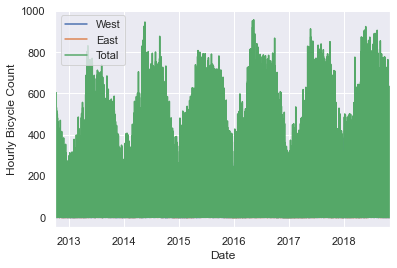

In [22]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0, 0.5, 'Weekly bicycle count')

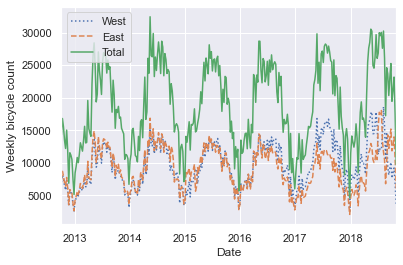

In [23]:
# 25,000개의 시간별 표본 이해하기 어려움
# 데이터를 주 단위로 리 샘플링
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')


In [24]:
# 겨울보다 여름에 자전거를 더 많이 타며
# 특정 계절에는 자전거 사용 횟수가 주 마다 달라진다. 

Text(0, 0.5, 'mean hourly count')

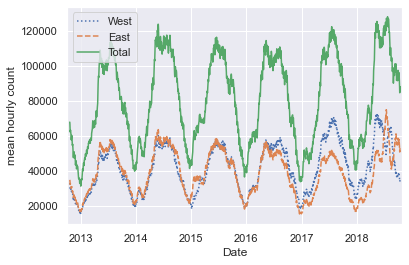

In [25]:
# 30일 이동 평균(rolling)
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

<AxesSubplot:xlabel='Date'>

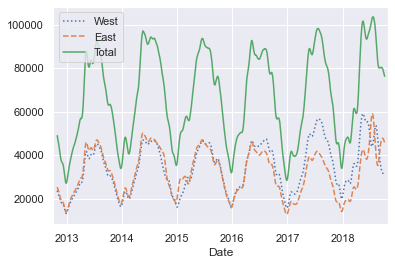

In [26]:
# 가우스평활(Gaussian smoothing) 적용
# 가우스 윈도우(Gaussian window) 같은 윈도우 함수를 사용해 롤링 평균을 부드럽게 표현
# 윈도우 폭(50일)과 윈도우내 가우스 폭(10) 지정
daily.rolling(50, center=True,
 win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

<AxesSubplot:xlabel='time'>

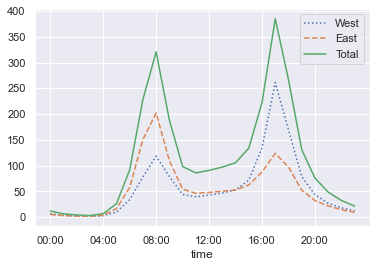

In [27]:
# 하루의 시간대를 기준으로 한 함수로 평균 통행량을 보고 싶을때
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])


In [28]:
# 아침 8시, 저녁 5시 무렵에 많이 사용
# 동서가 확연하게 나누어짐.. 출근 사용량

<AxesSubplot:>

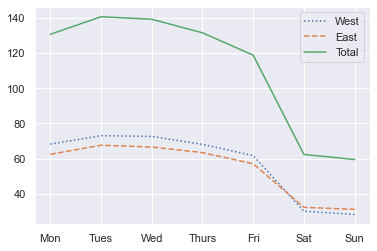

In [29]:
# 요일별 통행량은? 
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])


In [30]:
# 주중에 많고.. 주말에 적음.. 출퇴근 용 가능성..

In [31]:
# 주중과 주말의 시간대별 추이
# 데이터를 주말을 표시하는 플래그와 시간대별로 분류
weekend = np.where(data.index.weekday <5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [34]:
by_time

West        East       Total
Weekday 00:00:00    5.616646    4.600252   10.216898
        01:00:00    2.625473    2.350567    4.976040
        02:00:00    1.660782    1.707440    3.368222
        03:00:00    1.293190    1.497478    2.790668
        04:00:00    3.284994    4.342371    7.627364
        05:00:00   12.124842   21.496217   33.621059
        06:00:00   44.283102   77.169609  121.452711
        07:00:00  103.431274  204.063682  307.494956
        08:00:00  154.981084  270.314628  425.295712
        09:00:00   95.291483  135.668139  230.959621
        10:00:00   44.016404   54.544479   98.560883
        11:00:00   33.926814   39.879495   73.806309
        12:00:00   36.225237   39.849842   76.075079
        13:00:00   40.134300   42.194199   82.328499
        14:00:00   48.225725   45.167087   93.392812
        15:00:00   74.413619   59.441362  133.854981
        16:00:00  165.027112   96.728878  261.755990
        17:00:00  345.211223  151.732030  496.943253
        18:00:00  221.565574  119.021438  340.587011
        19:00:00   98.963430   62.368852  161.332282
        20:00:00   52.647541   37.052333   89.699874
        21:00:00   31.238335   24.926860   56.165195
        22:00:00   20.177806   16.027112   36.204918
        23:00:00   13.071879    9.829130   22.901009
Weekend 00:00:00    9.556782    7.034700   16.591483
        01:00:00    5.293375    4.361199    9.654574
        02:00:00    3.325914    3.023847    6.349762
        03:00:00    1.728707    1.965300    3.694006
        04:00:00    2.085174    1.911672    3.996845
        05:00:00    3.285489    4.252366    7.537855
        06:00:00    8.760252    8.512618   17.272871
        07:00:00   14.714511   17.104101   31.818612
        08:00:00   27.167192   31.919558   59.086751
        09:00:00   37.531546   43.820189   81.351735
        10:00:00   43.949527   53.728707   97.678233
        11:00:00   53.477918   62.343849  115.821767
        12:00:00   59.611987   68.190852  127.802839
        13:00:00   63.498423   70.801262  134.299685
        14:00:00   64.481073   71.526814  136.007886
        15:00:00   64.164038   70.082019  134.246057
        16:00:00   59.408517   64.564669  123.973186
        17:00:00   51.364353   53.854890  105.219243
        18:00:00   39.477918   42.558360   82.036278
        19:00:00   27.676656   28.028391   55.705047
        20:00:00   21.219243   19.790221   41.009464
        21:00:00   15.558360   13.970032   29.528391
        22:00:00   12.403785   10.301262   22.705047
        23:00:00   10.268139    7.712934   17.981073

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

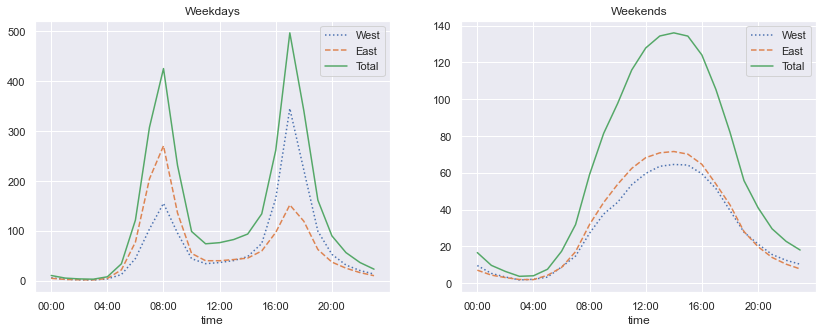

In [37]:
# 다중 서브플롯
import matplotlib.pyplot as plt
fgs, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
 xticks=hourly_ticks, style=[':','--','-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
 xticks=hourly_ticks, style=[':','--','-'])


In [ ]:
# 주중에서 양봉형태.. 주말에는 낮시간에 피크..
# 출퇴근 패턴에 영향을 미치는 날시와 온도, 연중 시기등 기타 요인 분석이 필요

In [ ]:
# Is settle really Seeing an Uptick In Cycling? 


In [ ]:
# ( 시애틀의 자전거 통행량 예측 ) 
# 미 기상청의 데이터세트와 연결
# 선형 회귀를 사용해 날씨와 다른 정보를 자전거 수와 관련 짓고
# 이 가운데 한 가지 모수의 변화가 해당 일자에 자전거를 탄 사람의 수에 어떻게 영향을 주는 지 추정


In [ ]:
# 데이터를 적재하고 날짜를 인덱스로 지정
# FremontBridge.csv --> goo.gl/o3FkTM
# BicycleWeather.csv -> goo.gl/7ncbCd
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [ ]:
counts.head(3)

In [ ]:
weather.head(3)

In [ ]:
# 일별 총 자전거 통랭량을 계산해서 별도의 DataFrame에 넣음
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # 다른 열 삭제

In [ ]:
daily.head(3)

In [ ]:
# 요일을 나타내는 열 추가
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
 daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [ ]:
daily.head(3)

In [ ]:
# 휴일에 자전거를 타는 사람
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)


In [ ]:
daily.head(3)

In [ ]:
# 일조시간에 자전거를 타는 사람
def hours_of_daylight(date, axis=23.44, latitude=47.61):
 # 해당 날짜의 일조시간 계산
 days = (date - pd.datetime(2000, 12, 21)).days
 m = (1. -np.tan(np.radians(latitude))
 * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
 return 24 * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)


In [ ]:
# 데이터에 평균 기온과 전체 강수량 추가
# 인치 단위의 강수량과 더불어 날이 건조했는지(강수량이 0) 알려주는 플래그 추가
# 기온은 섭씨 1/10도 단위, 섭씨 1도 단위로 변환
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (c)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
# 강수량은 1/10mm 단위; 인치 단위로 변환
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (c)', 'dry day']])

In [ ]:
daily.head(4)

In [ ]:
# 첫날 부터 증가하는 계수기를 추가해 몇 해가 지났는지를 측정
# 관측된 일별 통행량이 연도별로 증가하거나 감소하는지를 측정
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [ ]:
daily.head(5)

In [ ]:
# 요일 플래그는 해당 요일에 특화된 절편으로 동작하기 때문에 fit_intercept = False로 설정

In [ ]:
# 널값 행은 제거
daily.dropna(axis=0, how='any', inplace=True)
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 
 'holiday', 'daylight_hrs', 'PRCP', 'dry day','Temp (c)', 'annual']
X = daily[column_names]
y = daily['Total']


In [ ]:
X.head(3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)
#총 자전거 통행량과 예상 자전거 통행량 비교
daily[['Total', 'predicted']].plot(alpha=0.5)


In [ ]:
# 여름에 차이가 많이 남
# 고려한 요인 외
## -. 사람들이 일하러 갈때 자전거를 탈지 결정하는 데 영향을 주는 요인은 뭐가 있을까? 
# 미처 고려하지 못한 비선형 관계
## -. 사람들이 기온이 너무 높거나 낮을 때 자전거를 덜 탈 수 도 있다. 

In [ ]:
# 각 특징이 요일별 자전거 통행량에 얼마나 기여하는지 추정하는 선형 모델 계수
params = pd.Series(model.coef_, index=X.columns)
params


In [ ]:
# 불확실성에 대한 척도 없이는 해석이 어려움
# 데이터의 부트스트랩 표본 재추출(bootstrap resampling)을 사용하여 불확실성을 계산
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
 for i in range(1000)], 0 )


In [ ]:
# 추정된 오차를 가지고 결과를
print(pd.DataFrame({'effect' : params.round(0), 'error' : err.round(0)}))

In [ ]:
# 주단위로 비교적 안정적인 추세
# 주말과 휴일보다 주중에 자전거를 타는 사람이 훨씬 많다. 
# 일조시간이 1시간 늘어날때마다 129+-9명이 더 자전거를 탄다. 
# 기온이 섭씨 1도씩 증가할 때마다 65+-4명의 사람이 더 자전거를 잡는다. 
# 맑은날은 평균 548+_33명이 더 자전거를 탄다. 
# 강수량이 1인치 늘어날때마다 665+-62명의 사람이 자전거를 집에 두고 나온다. 
# 매년 일별 자전거 사용자가 27+-18명씩 완만하게 증가하고 있다. 


In [ ]:
# 이 모델이 몇가지 관련 정보를 누락하고 있음. 
## -.비 선형 효과(예. 강수량과 추운 기온의 영향),
## -.각 변수 내의 비선형 추세(예. 매우 춥거나 매우 더운 온도에서 자전거 통행량의 감소)
# 는 이 모델로 설명할 수 없음. 
# 몇 가지 세부적인 정보는 고려하지 않았음. 
## -. 아침에 비가 오는 것과 오후에 비가 오는 것의 차이
## -. 요일간의 상관 관계